In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

C:\Users\mathew\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mathew\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mathew\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mathew\anaconda3\envs\myenv\lib\site-packages\tensorflow\pyth

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
test_images.shape

(10000, 28, 28)

In [28]:
train_data=train_images.reshape(60000,784)

In [29]:
test_data=test_images.reshape(10000,784)

In [56]:
X_train1=train_data/255
X_test=test_data/255
y_train1=train_labels
y_train1.shape

(60000,)

In [57]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train1, y_train1, test_size = 0.2, random_state=0)


In [58]:
y_train.shape

(48000,)

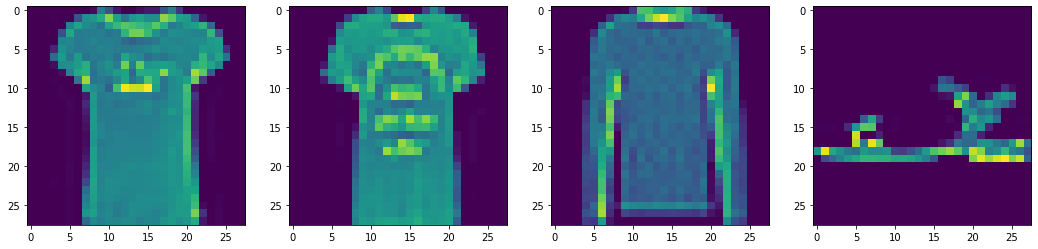

In [33]:
# Lets check some images
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

In [34]:

n_cols = X_train.shape[1]
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [37]:
model_1 = model.fit(X_train, y_train,
                    batch_size=300,
                    epochs = 20,
                    verbose=1,
                    validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 132us/step - loss: 0.9962 - accuracy: 0.6902 - val_loss: 0.5931 - val_accuracy: 0.8039
Epoch 2/20
48000/48000 [==============================] - 5s 101us/step - loss: 0.5232 - accuracy: 0.8267 - val_loss: 0.4810 - val_accuracy: 0.8368
Epoch 3/20
48000/48000 [==============================] - 5s 110us/step - loss: 0.4549 - accuracy: 0.8458 - val_loss: 0.4572 - val_accuracy: 0.8393
Epoch 4/20
48000/48000 [==============================] - 5s 107us/step - loss: 0.4202 - accuracy: 0.8561 - val_loss: 0.4179 - val_accuracy: 0.8562
Epoch 5/20
48000/48000 [==============================] - 5s 108us/step - loss: 0.3983 - accuracy: 0.8624 - val_loss: 0.4009 - val_accuracy: 0.8593
Epoch 6/20
48000/48000 [==============================] - 6s 120us/step - loss: 0.3814 - accuracy: 0.8693 - val_loss: 0.3974 - val_accuracy: 0.8637
Epoch 7/20
48000/48000 [==============================] - 5s 1

In [38]:
X_Test=test_images.reshape(10000,784)
Y_Test=test_labels
score = model.evaluate(X_Test/255,Y_Test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.34707554030418397
Test accuracy: 87.55999803543091


In [59]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_Test = X_Test.reshape(X_Test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_Test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [60]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_Test = to_categorical(Y_Test, 10)

In [61]:

cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten()) 

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(10, activation='softmax'))

In [62]:
cnn_model.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [63]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [64]:
history = cnn_model.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 37s 776us/step - loss: 1.1826 - accuracy: 0.6259 - val_loss: 0.6532 - val_accuracy: 0.7813
Epoch 2/50
48000/48000 [==============================] - 37s 771us/step - loss: 0.6437 - accuracy: 0.7802 - val_loss: 0.5269 - val_accuracy: 0.8208
Epoch 3/50
48000/48000 [==============================] - 36s 751us/step - loss: 0.5443 - accuracy: 0.8112 - val_loss: 0.4643 - val_accuracy: 0.8417
Epoch 4/50
48000/48000 [==============================] - 37s 761us/step - loss: 0.4917 - accuracy: 0.8295 - val_loss: 0.4316 - val_accuracy: 0.8521
Epoch 5/50
48000/48000 [==============================] - 47s 975us/step - loss: 0.4617 - accuracy: 0.8396 - val_loss: 0.4105 - val_accuracy: 0.8593
Epoch 6/50
48000/48000 [==============================] - 46s 962us/step - loss: 0.4347 - accuracy: 0.8490 - val_loss: 0.3893 - val_accuracy: 0.8652
Epoch 7/50
48000/48000 [==============================] 

In [69]:
X_test=X_Test.reshape(10000,28,28,1)
score = cnn_model.evaluate(X_test, y_Test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 37.605051327943805
Test accuracy: 86.489999294281


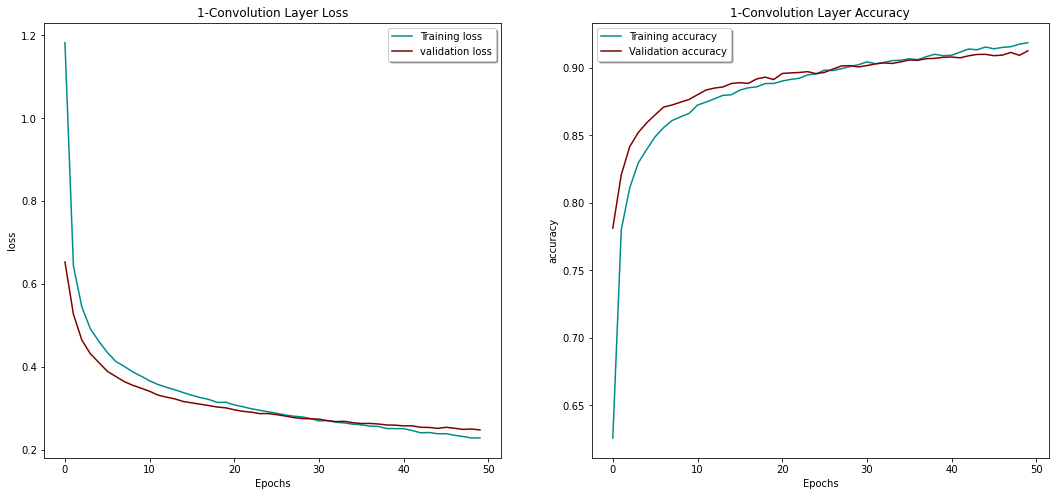

In [72]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Accuracy')
plt.show()

In [73]:
cnn_model_2 = Sequential()

cnn_model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model_2.add(Dropout(0.2))
cnn_model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model_2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())

cnn_model_2.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
cnn_model_2.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

cnn_model_2.add(Dense(10, activation='softmax'))

In [74]:
cnn_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [76]:
cnn_model_2.compile(optimizer= Adam(lr= 0.0001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [77]:
early_stopping_monitor = EarlyStopping(patience = 3)

In [78]:
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 155s 3ms/step - loss: 1.1413 - accuracy: 0.6198 - val_loss: 0.6449 - val_accuracy: 0.7662
Epoch 2/50
48000/48000 [==============================] - 156s 3ms/step - loss: 0.5704 - accuracy: 0.7893 - val_loss: 0.5291 - val_accuracy: 0.8096
Epoch 3/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.4973 - accuracy: 0.8164 - val_loss: 0.4674 - val_accuracy: 0.8321
Epoch 4/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.4592 - accuracy: 0.8366 - val_loss: 0.4405 - val_accuracy: 0.8441
Epoch 5/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.4310 - accuracy: 0.8483 - val_loss: 0.4131 - val_accuracy: 0.8602
Epoch 6/50
48000/48000 [==============================] - 153s 3ms/step - loss: 0.4136 - accuracy: 0.8530 - val_loss: 0.4018 - val_accuracy: 0.8614
Epoch 7/50
48000/48000 [==============================] - 153s

In [80]:
score = cnn_model_2.evaluate(X_test, y_Test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 41.826256401438286
Test accuracy: 87.51000165939331


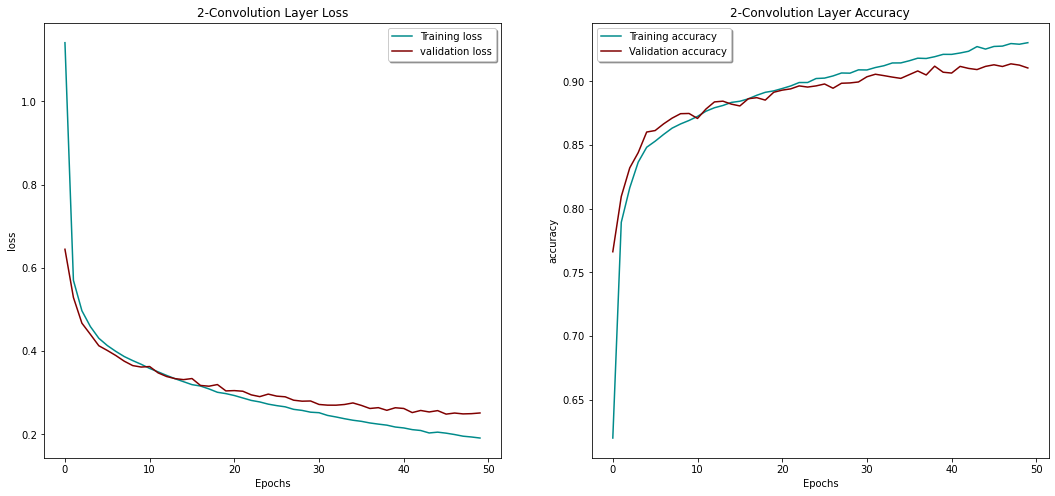

In [82]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Loss')
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2-Convolution Layer Accuracy')
plt.show()

In [83]:
cnn_model_4 = Sequential()

cnn_model_4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(2))

cnn_model_4.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_4.add(Dropout(0.4))
cnn_model_4.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_4.add(MaxPooling2D(2, 2))
cnn_model_4.add(Dropout(0.4))

cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(128, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(256, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(512, activation='relu'))
cnn_model_4.add(Dropout(0.5))

cnn_model_4.add(Dense(10, activation='softmax'))

In [84]:
cnn_model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 256)     

In [85]:
cnn_model_4.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
history_4 = cnn_model_4.fit(X_train, y_train,
                            validation_data=(X_validate, y_validate),
                            epochs=90, 
                            batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/90
48000/48000 [==============================] - 781s 16ms/step - loss: 1.7277 - accuracy: 0.3359 - val_loss: 1.0968 - val_accuracy: 0.5873
Epoch 2/90
48000/48000 [==============================] - 643s 13ms/step - loss: 1.0319 - accuracy: 0.6044 - val_loss: 0.6606 - val_accuracy: 0.7537
Epoch 3/90
48000/48000 [==============================] - 642s 13ms/step - loss: 0.7765 - accuracy: 0.7138 - val_loss: 0.5652 - val_accuracy: 0.7835
Epoch 4/90
48000/48000 [==============================] - 636s 13ms/step - loss: 0.6889 - accuracy: 0.7479 - val_loss: 0.5250 - val_accuracy: 0.8023
Epoch 5/90
48000/48000 [==============================] - 642s 13ms/step - loss: 0.6383 - accuracy: 0.7682 - val_loss: 0.4915 - val_accuracy: 0.8188
Epoch 6/90
48000/48000 [==============================] - 635s 13ms/step - loss: 0.5992 - accuracy: 0.7853 - val_loss: 0.4611 - val_accuracy: 0.8388
Epoch 7/90
48000/48000 [==============================] 

48000/48000 [==============================] - 619s 13ms/step - loss: 0.2264 - accuracy: 0.9213 - val_loss: 0.2255 - val_accuracy: 0.9193
Epoch 56/90
48000/48000 [==============================] - 637s 13ms/step - loss: 0.2243 - accuracy: 0.9202 - val_loss: 0.2255 - val_accuracy: 0.9183
Epoch 57/90
48000/48000 [==============================] - 652s 14ms/step - loss: 0.2190 - accuracy: 0.9213 - val_loss: 0.2221 - val_accuracy: 0.9207
Epoch 58/90
48000/48000 [==============================] - 657s 14ms/step - loss: 0.2143 - accuracy: 0.9225 - val_loss: 0.2155 - val_accuracy: 0.9231
Epoch 59/90
48000/48000 [==============================] - 620s 13ms/step - loss: 0.2180 - accuracy: 0.9225 - val_loss: 0.2384 - val_accuracy: 0.9147
Epoch 60/90
48000/48000 [==============================] - 631s 13ms/step - loss: 0.2161 - accuracy: 0.9237 - val_loss: 0.2155 - val_accuracy: 0.9231
Epoch 61/90
48000/48000 [==============================] - 836s 17ms/step - loss: 0.2116 - accuracy: 0.9251 - va